In [197]:
using Plots
using Printf
using LinearAlgebra

In [198]:
folder_path = "graficos/"

if !isdir(folder_path)
    mkdir(folder_path)
end
;

subfolder_name = "simulacao_do_MEF"

full_path = joinpath(folder_path, subfolder_name)

if !isdir(full_path)
    mkdir(full_path)
end

subfolder_name = "Q3"

full_path = joinpath(full_path, subfolder_name)

if !isdir(full_path)
    mkdir(full_path)
end
;

In [199]:
# Define os pesos para os pontos de integração (argumentos: nint -> número de pontos de integração)

function we(nint)
    w = zeros(nint)
    if(nint == 2)
        w[1] = 1.0
        w[2] = 1.0
    elseif(nint == 3)
        w[1] = 5/9
        w[2] = 8/9
        w[3] = 5/9
    elseif(nint == 4)
        w[1] = (18-sqrt(30.))/36;
        w[2] = (18+sqrt(30.))/36;
        w[3] = (18+sqrt(30.))/36;
        w[4] = (18-sqrt(30.))/36;
    elseif(nint == 5)
        w[1] = (322-13*sqrt(70))/900;
        w[2] = (322+13*sqrt(70))/900;
        w[3] =  128/225;
        w[4] = (322+13*sqrt(70))/900;
        w[5] = (322-13*sqrt(70))/900;
    end
    return w
end
;

# Define os pontos de integração (argumentos: nint -> número de pontos de integração)
function pe(nint)
    pt = zeros(nint)
    if(nint == 2)
        pt[1] = -sqrt(3.)/3.;
        pt[2] = sqrt(3.)/3.;
    elseif(nint == 3)
        pt[1] = sqrt(3/5);
        pt[2] = 0;
        pt[3] = -sqrt(3/5);
    elseif(nint == 4)
        pt[1] = sqrt((3+2*sqrt(6/5))/7);
        pt[2] = sqrt((3-2*sqrt(6/5))/7);
        pt[3] = -sqrt((3-2*sqrt(6/5))/7);
        pt[4] = -sqrt((3+2*sqrt(6/5))/7);
    elseif(nint == 5)
        pt[1] = -(1/3)*sqrt((5+2*sqrt(10/7)));
        pt[2] = -(1/3)*sqrt((5-2*sqrt(10/7)));
        pt[3] =   0;
        pt[4] = +(1/3)*sqrt((5-2*sqrt(10/7)));
        pt[5] = +(1/3)*sqrt((5+2*sqrt(10/7)));
    end
    
    return pt
end
;

In [200]:
# Função que define os polinômios de integração (argumentos: typ -> se é o polinômio [1] ou a derivada do polinômio [0]; nen -> número de nós do elemento; nint -> número de pontos de integração)

function shl(typ, nen, nint)
    
    pt = pe(nint)
    w = we(nint)
    
    if(typ == 1)
        sh = zeros(nen, nint)
        for l=1:nint
            t=pt[l];
            if(nen==2)
                sh[1,l] = (1.0-t)/2.0;
                sh[2,l] = (1.0+t)/2.0;
            elseif(nen==3)
                sh[1,l] = t*(t-1.0)/2.0;
                sh[2,l] = -(t-1)*(t+1);
                sh[3,l] = t*(t+1.0)/2.0;
            elseif(nen==4)
                sh[1,l] = -( 9/16)*(t+(1/3))*(t-(1/3))*(t-1);
                sh[2,l] =  (27/16)*(t+1)    *(t-(1/3))*(t-1);
                sh[3,l] = -(27/16)*(t+1)    *(t+(1/3))*(t-1);
                sh[4,l] =  ( 9/16)*(t+1)    *(t+(1/3))*(t-(1/3));
            elseif(nen==5)
                sh[1,l] =  (2/3)*(t+(1/2))*t*(t-(1/2))*(t-1);
                sh[2,l] = -(8/3)*(t+1)*t*(t-(1/2))*(t-1);
                sh[3,l] =      4*(t+1)*(t+(1/2))*(t-(1/2))*(t-1);
                sh[4,l] = -(8/3)*(t+1)*(t+(1/2))*t*(t-1);
                sh[5,l] =  (2/3)*(t+1)*(t+(1/2))*t*(t-(1/2)); 
            end
        end
        return sh
    elseif(typ == 2)
        dsh = zeros(nen, nint)
        for l=1:nint
            t=pt[l];
            if(nen==2)
                dsh[1,l] = (-1.0)/2.0;
                dsh[2,l] = (1.0)/2.0;
            elseif(nen==3)
                dsh[1,l] = (2*t + 1)/2.0;
                dsh[2,l] = -2*t;
                dsh[3,l] = (2*t - 1)/2.0;
            elseif(nen==4)
                dsh[1,l] = -(27*t*t - 18*t - 1)/16;
                dsh[2,l] = 9*(9*t*t - 2*t - 3)/16;
                dsh[3,l] = -9*(9*t*t + 2*t - 3)/16;
                dsh[4,l] = +(27*t*t + 18*t - 1)/16;
            elseif(nen==5)
                dsh[1,l] = (16*(t^3) - 12*(t^2) - 2*t + 1)/6;
                dsh[2,l] = -4*(8*(t^3) - 3*(t^2) - 4*t + 1)/3;
                dsh[3,l] = (16*(t^3) - 10*t)
                dsh[4,l] = -4*(8*(t^3) + 3*(t^2) - 4*t - 1)/3;
                dsh[5,l] = (16*(t^3) + 12*(t^2) - 2*t - 1)/6;
            end
        end
        return dsh
    end
end
;

In [201]:
function shl_bubble(typ, nen, nint, beta)
    pt = pe(nint)
    w = we(nint)
    if(typ == 1)
        sh = zeros(nen, nint)
        for l=1:nint
            t=pt[l]
            sh[1,l] = (1-t)/2 - (3/4)*beta*(1-(t^2))
            sh[2,l] = (1+t)/2 + (3/4)*beta*(1-(t^2))
        end
        return sh
    elseif(typ == 2)
        dsh = zeros(nen, nint)
        for l=1:nint
            t=pt[l]
            dsh[1,l] = (-1)/2 - (3/4)*beta*(-2*(t^2))
            dsh[2,l] = (1)/2 + (3/4)*beta*(-2*(t^2))
        end
        return dsh
    end
end
;

In [202]:
# Define os intervalos reais do elemento

a = 0
b = +2.0
;

In [203]:
function translate_x(t, x1, x2)
    return t*(x2-x1)/2 + (x1+x2)/2
end
;

In [204]:
function u(x)
    return 0
end
;

In [205]:
function u_ex(x, t, epsilon, kappa)
    return (1/sqrt(4*t + 1)) * exp(-(x - kappa*t - 0.5)^2 / (epsilon*(4*t + 1)))
end
;

In [206]:
function phi_0(x, epsilon, kappa)
    return u_ex(x, 0, epsilon, kappa)
end
;

In [207]:
function alpha_1(t, epsilon, kappa)
    return u_ex(a, t, epsilon, kappa)
end

function alpha_2(t, epsilon, kappa)
    return u_ex(b, t, epsilon, kappa)
end
;

# Letra B

[0.020000000000000004, 0.10000000000000002, 0.20000000000000004]
[100, 20, 10]
a = 0
b = 2.0
ti = 0.0
tf = 1.25
(101,)
(3127,)
(21,)
(3253,)
(11,)
(3286,)


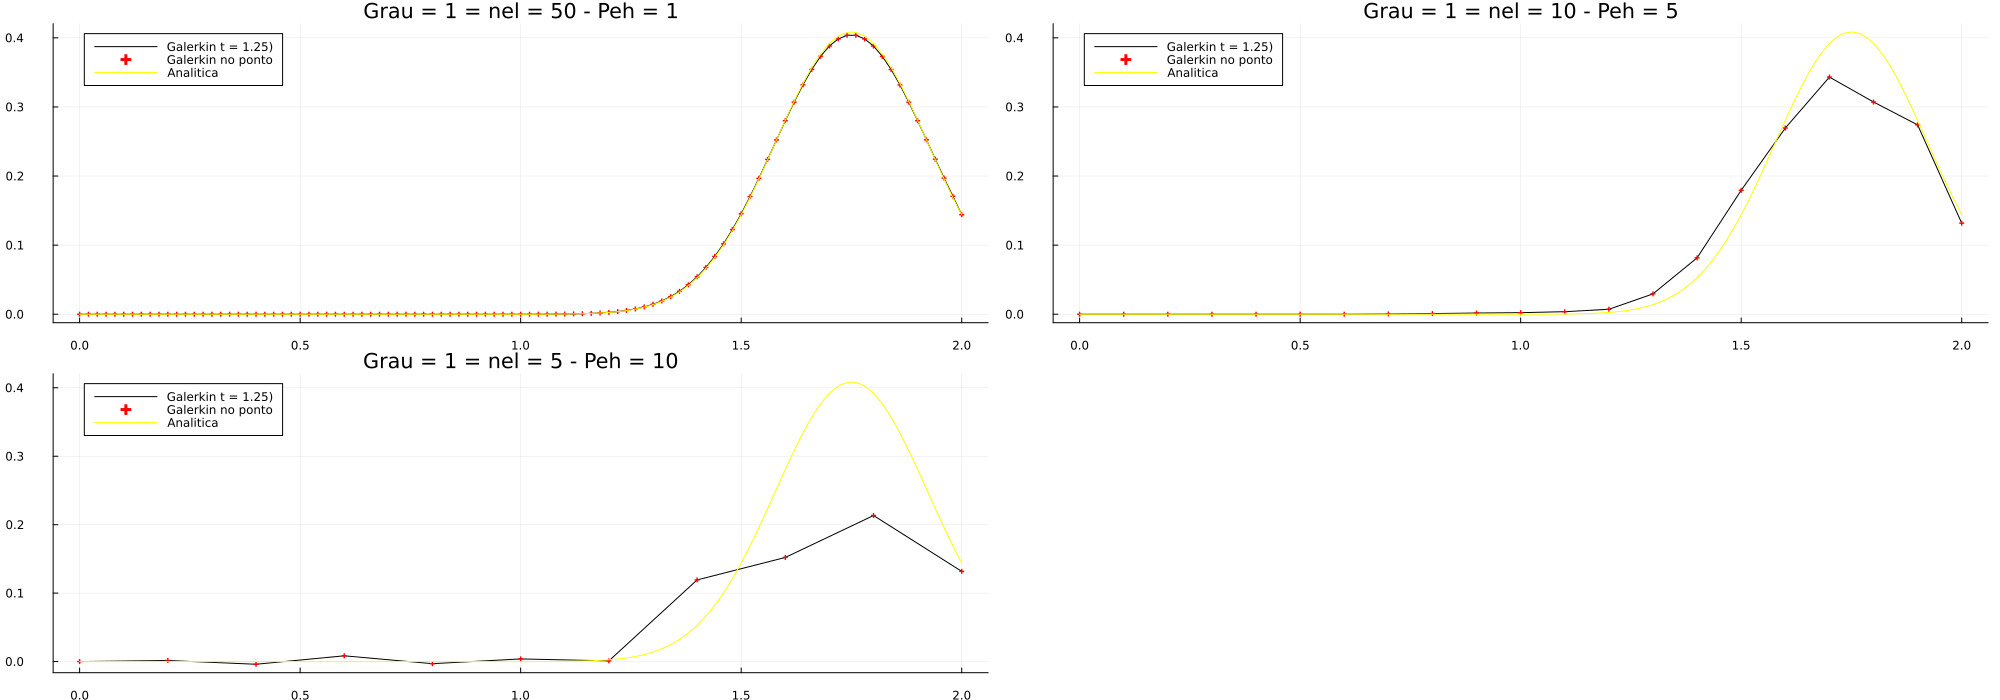

end


In [208]:
function mef_simulacao_letra_b(folder_to_save)
    Peh = [1, 5, 10]
    epsilon = 10^(-2)
    kappa = 1
    degree = 1
    
    xi = a
    xf = b
    
    ti = 0.00
    tf = 1.25
    
    h_Peh = [(P*2*epsilon)/abs(kappa) for P in Peh]
    print(h_Peh)
    print("\n")
    
    n_values = [ceil(Int64,(xf-xi)/(hh)) for hh in h_Peh]
    print((n_values))
    print("\n")
    
    println("a = $a")
    println("b = $b")
    println("ti = $ti")
    println("tf = $tf")
    
    # Dirichtler
    g_a = 0
    g_b = 0

    # Neumann
    q_a = 0
    q_b = 0

    kappa_a = 10^6
    kappa_b = 10^6
    
    solution_galerkin_over_time = Vector{Vector{Float64}}([])
    xizes = Vector{Vector{Float64}}([])
    solution_galerkin_over_time_phx = Vector{Vector{Vector{Float64}}}([])
    # solution_SUPG_over_time = Vector{Vector{Float64}}([])
    
    # Galerkin
    
        # Galerkin
    p = plot(layout=(3), size=(1000, 1000))
    for (Peh_index, nel) in enumerate(n_values) #l1
        nint = degree + 1
        nen = nint
        
        np = nel*degree + 1
        
        x = LinRange(xi, xf, np)
        
        M = zeros(np, np)
        M_mass = zeros(np, np)
        F = zeros(np)

        shg  = shl(1, nen, nint)
        dshg = shl(2, nen, nint)
        # dshg = reverse((dshg))

        t = pe(nint)
        w = we(nint)

        idx = 1

        h = (x[degree+1] - x[1])
        dt = h^2
        time_vector = range(ti, tf, step=dt)
        
        for n in 1:(nel) #l2
            Me = zeros(nint, nint)
            Me_mass = zeros(nint, nint)
            Fe = zeros(nint)
            
            for l in 1:(nint) #l4
                    tt = t[l]
                    ww = w[l]
                    xx = translate_x(tt, x[idx], x[idx+degree])
                    for j in 1:(nen) #l5    
                        
                        # Fe[j] += u(xx) * shg[j, l] * ww * h/2

                        for i in 1:nen #l6
                            Me[i, j] += epsilon * dshg[i, l] * dshg[j, l] * ww * 2/h
                            Me[i, j] += kappa * shg[i, l] * dshg[j, l] * ww 
                            Me[i, j] += shg[i, l] * shg[j, l] * ww * (h/2)/dt
                        
                            Me_mass[i, j] += shg[i, l] * shg[j, l] * ww * (h/2)/dt
                        end #l6
                            
                    end #l5

            end #l4
            
            for i in 0:nint-1 #f7
                # F[idx+i] += Fe[i+1]
                for j in 0:nint-1 #l8
                    M[idx+i, idx+j] += Me[i+1, j+1]
                    M_mass[idx+i, idx+j] += Me_mass[i+1, j+1]
                end #l8
            end #ef7
            idx += degree
        end #l2
        
        M[1, 1] += kappa_a
        # F[1] += kappa_a*g_a - q_a
        
        M[size(M)[1], size(M)[2]] += kappa_b
        # F[size(F)[1]] += kappa_b*g_b - q_b
        # alphas = M\F
        
        # print(M_mass)
        # return 
        
        tn = ti
        
        # solution_galerkin_over_time
        solution_galerkin_pass0 = zeros(size(x)[1])
        println(size(solution_galerkin_pass0))
        
        for position in 1:size(x)[1]
            solution_galerkin_pass0[position] = phi_0(x[position], epsilon, kappa)
        end
        
        push!(solution_galerkin_over_time, solution_galerkin_pass0)
        counter = 0
        while(tn < tf)#w1
            F = M_mass * solution_galerkin_over_time[size(solution_galerkin_over_time)[1]]
            g_a = alpha_1(tn, epsilon, kappa)
            g_b = alpha_2(tn, epsilon, kappa)
            F[1] += kappa_a*g_a - q_a
            F[size(F)[1]] += kappa_b*g_b - q_b
            
            alphas = M\F
            
            
            push!(solution_galerkin_over_time, alphas)
            
            counter += 1
            tn += dt
        end#w1
        # solution_galerkin_over_time[size(solution_galerkin_over_time)[1]][1]
        # return
        println(size(solution_galerkin_over_time))
        
        # plot!(p[Peh_index...], x, solution_galerkin_over_time[1], label="Galerkin t = 0", color="black")
        # plot!(p[Peh_index...], x, solution_galerkin_over_time[1], label="Galerkin no ponto", color="red", marker=:cross, seriestype=:scatter, ms=2.5)
        # plot!(p[Peh_index...], range(a, stop=b, length=500), x -> u_ex(x, 0, epsilon, kappa), label="Analitica", color="yellow")
        # plot!(p[Peh_index...], grid=true, legend=:topleft, size=(2000,700))

        # plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1]/4)], label="Galerkin t = $(time_vector[ceil(Int64,size(time_vector)[1]/4)])", color="black")
#         plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1]/4)], label="Galerkin no ponto", color="red", marker=:cross, seriestype=:scatter, ms=2.5)
#         plot!(p[Peh_index...], range(a, stop=b, length=500), x -> u_ex(x, time_vector[ceil(Int64,size(time_vector)[1]/4)], epsilon, kappa), label="Analitica", color="yellow")
#         plot!(p[Peh_index...], grid=true, legend=:topleft, size=(2000,700))
        
#         plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1]/2)], label="Galerkin t = $(time_vector[ceil(Int64,size(time_vector)[1]/2)])", color="black")
#         plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1]/2)], label="Galerkin no ponto", color="red", marker=:cross, seriestype=:scatter, ms=2.5)
#         plot!(p[Peh_index...], range(a, stop=b, length=500), x -> u_ex(x, time_vector[ceil(Int64,size(time_vector)[1]/2)], epsilon, kappa), label="Analitica", color="yellow")
#         plot!(p[Peh_index...], grid=true, legend=:topleft, size=(2000,700))
        
        plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1])], label="Galerkin t = 1.25)", color="black")
        plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1])], label="Galerkin no ponto", color="red", marker=:cross, seriestype=:scatter, ms=2.5)
        plot!(p[Peh_index...], range(a, stop=b, length=500), x -> u_ex(x, 1.25, epsilon, kappa), label="Analitica", color="yellow")
        plot!(p[Peh_index...], grid=true, legend=:topleft, size=(2000,700))
        
        
    end #l1
     title!(p[1...], "Grau = 1 = nel = 50 - Peh = 1")
    title!(p[2...], "Grau = 1 = nel = 10 - Peh = 5")
    title!(p[3...], "Grau = 1 = nel = 5 - Peh = 10")
    display(p)
    savefig(p, joinpath(folder_to_save, "grafico_todos_juntos.png"))
    println("end")
end #function
subfolder_name = "letra_b"

le_b = joinpath(full_path, subfolder_name)

if !isdir(le_b)
    mkdir(le_b)
end

mef_simulacao_letra_b(le_b)
;

In [209]:
t = range(0, 1.25, step=0.02)

# println(t[1])
# # println(t[ceil(Int64,size(t)[1]/4)])
# println(t[ceil(Int64,size(t)[1]/2)])
# println(t[ceil(Int64,size(t)[1]-1)])
# println(t[size(t)[1]])
println(size(t)[1])
for i in 1:size(t)[1]
    print("[$(t[i])]")
end
# p = plot(layout=(4), size=(2000, 1000))

63
[0.0][0.02][0.04][0.06][0.08][0.1][0.12][0.14][0.16][0.18][0.2][0.22][0.24][0.26][0.28][0.3][0.32][0.34][0.36][0.38][0.4][0.42][0.44][0.46][0.48][0.5][0.52][0.54][0.56][0.58][0.6][0.62][0.64][0.66][0.68][0.7][0.72][0.74][0.76][0.78][0.8][0.82][0.84][0.86][0.88][0.9][0.92][0.94][0.96][0.98][1.0][1.02][1.04][1.06][1.08][1.1][1.12][1.14][1.16][1.18][1.2][1.22][1.24]

In [210]:
# p = plot(layout=(4), size=(1000, 1000))

[0.020000000000000004, 0.10000000000000002, 0.20000000000000004]
[100, 20, 10]
a = 0
b = 2.0
ti = 0.0
tf = 1.25
epsilon = 0.010000000000000002
kappa = 1
(101,)
(21,)
(11,)


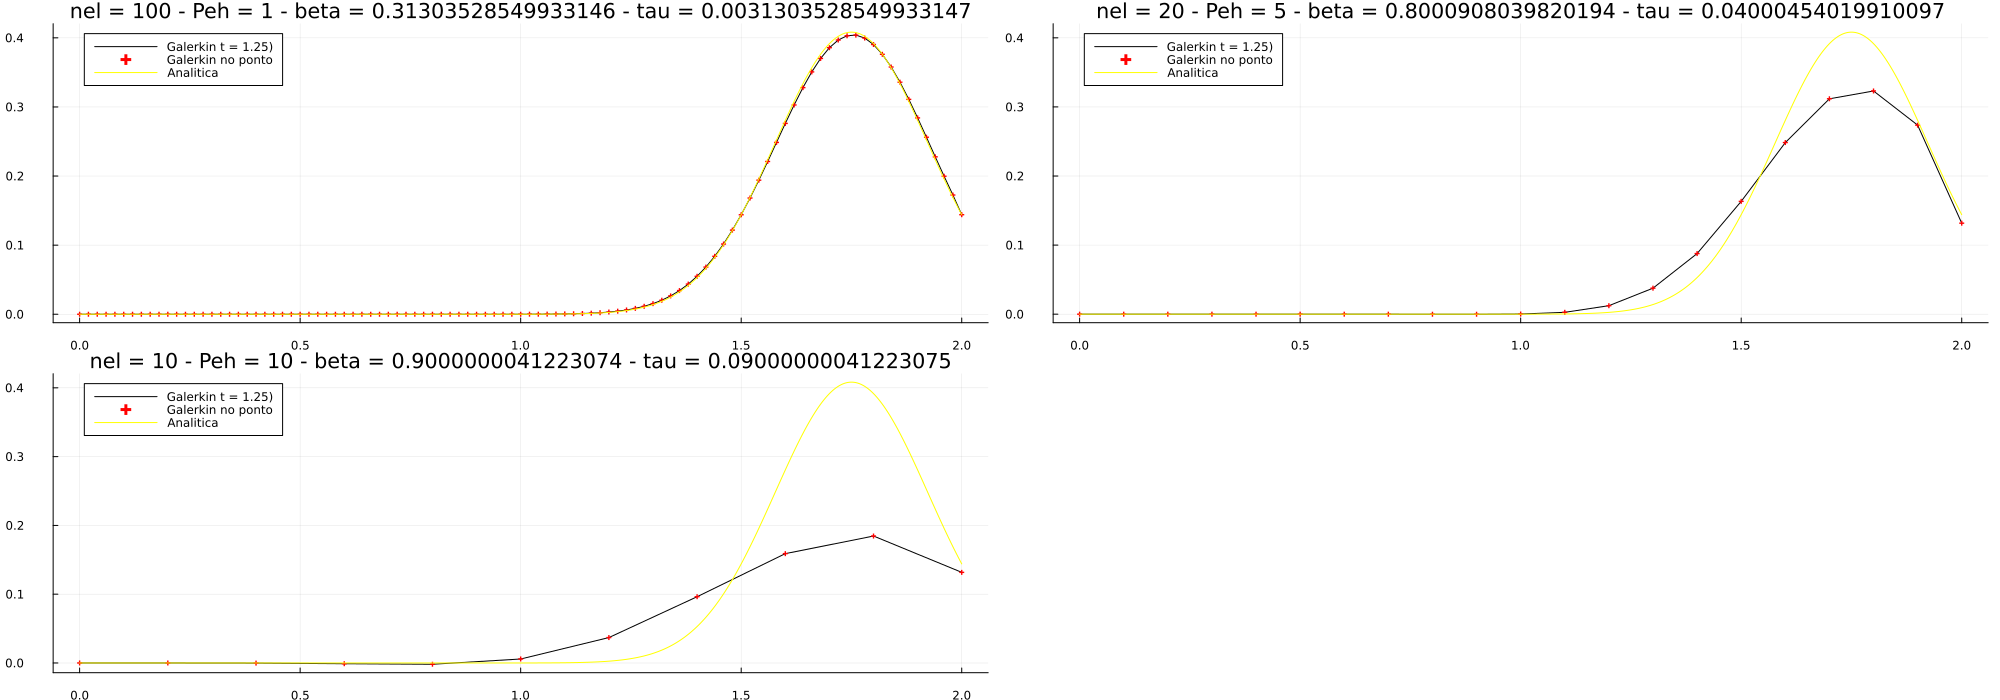

end


In [211]:
function mef_simulacao_letra_c(folder_to_save)
    Peh = [1, 5, 10]
    epsilon = 10^(-2)
    kappa = 1
    degree = 1
    
    xi = a
    xf = b
    
    ti = 0.00
    tf = 1.25
    
    h_Peh = [(P*2*epsilon)/abs(kappa) for P in Peh]
    print(h_Peh)
    print("\n")
    
    n_values = [ceil(Int64,(xf-xi)/(hh)) for hh in h_Peh]
    print((n_values))
    print("\n")
    
    println("a = $a")
    println("b = $b")
    println("ti = $ti")
    println("tf = $tf")
    println("epsilon = $epsilon")
    println("kappa = $kappa")
    
    # Dirichtler
    g_a = 0
    g_b = 0

    # Neumann
    q_a = 0
    q_b = 0

    kappa_a = 10^6
    kappa_b = 10^6
    
    solution_galerkin_over_time = Vector{Vector{Float64}}([])
    xizes = Vector{Vector{Float64}}([])
    solution_galerkin_over_time_phx = Vector{Vector{Vector{Float64}}}([])
    # solution_SUPG_over_time = Vector{Vector{Float64}}([])
    
    # Galerkin
    
        # Galerkin
    p = plot(layout=(3), size=(5000, 5000))
    for (Peh_index, nel) in enumerate(n_values) #l1
        nint = degree + 1
        nen = nint
        
        np = nel*degree + 1
        
        x = LinRange(xi, xf, np)
        
        M = zeros(np, np)
        M_mass = zeros(np, np)
        M_dev_v = zeros(np, np)
        F = zeros(np)

        shg  = shl(1, nen, nint)
        dshg = shl(2, nen, nint)
        # dshg = reverse((dshg))

        t = pe(nint)
        w = we(nint)

        idx = 1

        h = (x[degree+1] - x[1])
        dt = h^2
        time_vector = range(ti, tf, step=dt)
        beta = (1/tanh(Peh[Peh_index])) - (1/Peh[Peh_index])
        tau = beta*h/(2*kappa)
        for n in 1:(nel) #l2
            Me = zeros(nint, nint)
            Me_mass = zeros(nint, nint)
            Me_dev_v = zeros(nint, nint)
            Fe = zeros(nint)
            
            for l in 1:(nint) #l4
                    tt = t[l]
                    ww = w[l]
                    xx = translate_x(tt, x[idx], x[idx+degree])
                    for j in 1:(nen) #l5    
                        
                        # Fe[j] += u(xx) * shg[j, l] * ww * h/2

                        for i in 1:nen #l6
                        # println("\n----------------------------------------------------------------\n")
                        #     println("Me[i, j] = $(Me[i, j])")
                            Me[i, j] += (epsilon + (tau*(kappa^2))) * dshg[i, l] * dshg[j, l] * ww * 2/h
                            # println("Me[i, j] = $(Me[i, j])")
                            Me[i, j] += kappa * shg[i, l] * dshg[j, l] * ww 
                            # println("Me[i, j] = $(Me[i, j])")
                            Me[i, j] += shg[i, l] * shg[j, l] * ww * (h/2)/dt
                            # println("Me[i, j] = $(Me[i, j])")
                            Me[i, j] += tau * kappa * dshg[i, l] * shg[j, l] * ww/dt
                            # println("Me[i, j] = $(Me[i, j])")
                        
                            Me_mass[i, j]  += shg[i, l] * shg[j, l] * ww * (h/2)/dt
                            Me_dev_v[i, j] += tau * kappa * dshg[i, l] * shg[j, l] * ww/dt
                        # println("tau = $tau -> epsilon = $epsilon -> kappa = $kappa -> h = $(h) -> ww = $(ww)")
                        # println("\nMe")    
                        # println(Me)
                        # println("dshg[i, l] = $(dshg[i, l]) -> dshg[j, l] = $(dshg[i, l]) -> shg[i, l] = $(shg[i, l]) -> shg[j, l] = $(shg[j, l])")
                        # println("\n----------------------------------------------------------------\n")
                        end #l6
                            
                    end #l5

            end #l4
            # return
            for i in 0:nint-1 #f7
                # F[idx+i] += Fe[i+1]
                for j in 0:nint-1 #l8
                    M[idx+i, idx+j] += Me[i+1, j+1]
                    M_mass[idx+i, idx+j] += Me_mass[i+1, j+1]
                    M_dev_v[idx+i, idx+j] += Me_dev_v[i+1, j+1]
                end #l8
            end #ef7
            idx += degree
        end #l2
        
        M[1, 1] += kappa_a
        # F[1] += kappa_a*g_a - q_a
        
        M[size(M)[1], size(M)[2]] += kappa_b
        # F[size(F)[1]] += kappa_b*g_b - q_b
        # alphas = M\F
        
        # print(M_mass)
        # return 
        
        tn = ti
        
        # solution_galerkin_over_time
        solution_galerkin_pass0 = zeros(size(x)[1])
        println(size(solution_galerkin_pass0))
        
        for position in 1:size(x)[1]
            solution_galerkin_pass0[position] = phi_0(x[position], epsilon, kappa)
        end
        
        push!(solution_galerkin_over_time, solution_galerkin_pass0)
        counter = 0
        # println("\n\n")
        # println("M")
        # println(M)
        # println("\nM_mass")
        # println(M_mass)
        # println("\nM_dev_v")
        # println(M_dev_v)
        # return
        while(tn <= tf)#w1
            F = (M_mass * solution_galerkin_over_time[size(solution_galerkin_over_time)[1]]) + (M_dev_v * solution_galerkin_over_time[size(solution_galerkin_over_time)[1]])
            g_a = alpha_1(tn, epsilon, kappa)
            g_b = alpha_2(tn, epsilon, kappa)
            F[1] += kappa_a*g_a - q_a
            F[size(F)[1]] += kappa_b*g_b - q_b
            
            alphas = M\F
            push!(solution_galerkin_over_time, alphas)
            
            counter += 1
            tn += dt
        end#w1
        # solution_galerkin_over_time[size(solution_galerkin_over_time)[1]][1]
        # return
        # println(size(solution_galerkin_over_time))
        
        # plot!(p[Peh_index...], x, solution_galerkin_over_time[1], label="Galerkin t = 0", color="black")
        # plot!(p[Peh_index...], x, solution_galerkin_over_time[1], label="Galerkin no ponto", color="red", marker=:cross, seriestype=:scatter, ms=2.5)
        # plot!(p[Peh_index...], range(a, stop=b, length=500), x -> u_ex(x, 0, epsilon, kappa), label="Analitica", color="yellow")
        # plot!(p[Peh_index...], grid=true, legend=:topleft, size=(2000,700))

        # plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1]/4)], label="Galerkin t = $(time_vector[ceil(Int64,size(time_vector)[1]/4)])", color="black")
#         plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1]/4)], label="Galerkin no ponto", color="red", marker=:cross, seriestype=:scatter, ms=2.5)
#         plot!(p[Peh_index...], range(a, stop=b, length=500), x -> u_ex(x, time_vector[ceil(Int64,size(time_vector)[1]/4)], epsilon, kappa), label="Analitica", color="yellow")
#         plot!(p[Peh_index...], grid=true, legend=:topleft, size=(2000,700))
        
#         plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1]/2)], label="Galerkin t = $(time_vector[ceil(Int64,size(time_vector)[1]/2)])", color="black")
#         plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1]/2)], label="Galerkin no ponto", color="red", marker=:cross, seriestype=:scatter, ms=2.5)
#         plot!(p[Peh_index...], range(a, stop=b, length=500), x -> u_ex(x, time_vector[ceil(Int64,size(time_vector)[1]/2)], epsilon, kappa), label="Analitica", color="yellow")
#         plot!(p[Peh_index...], grid=true, legend=:topleft, size=(2000,700))
        
        plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1])], label="Galerkin t = 1.25)", color="black")
        plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1])], label="Galerkin no ponto", color="red", marker=:cross, seriestype=:scatter, ms=2.5)
        plot!(p[Peh_index...], range(a, stop=b, length=500), x -> u_ex(x, 1.25, epsilon, kappa), label="Analitica", color="yellow")
        plot!(p[Peh_index...], grid=true, legend=:topleft, size=(2000,700))
        title!(p[Peh_index...], "nel = $nel - Peh = $(Peh[Peh_index]) - beta = $beta - tau = $tau")
        
        
    end #l1
    # title!(p[1...], "Grau = 1 = nel = 50 - Peh = 1")
    # title!(p[2...], "Grau = 1 = nel = 10 - Peh = 5")
    # title!(p[3...], "Grau = 1 = nel = 5 - Peh = 10")
    display(p)
    savefig(p, joinpath(folder_to_save, "grafico_todos_juntos_beta_otimo.png"))
    println("end")
end #function
subfolder_name = "letra_c1"

le_c = joinpath(full_path, subfolder_name)

if !isdir(le_c)
    mkdir(le_c)
end

mef_simulacao_letra_c(le_c)
;

[0.020000000000000004, 0.10000000000000002, 0.20000000000000004]
[100, 20, 10]
a = 0
b = 2.0
ti = 0.0
tf = 1.25
epsilon = 0.010000000000000002
kappa = 1
(101,)
(21,)
(11,)


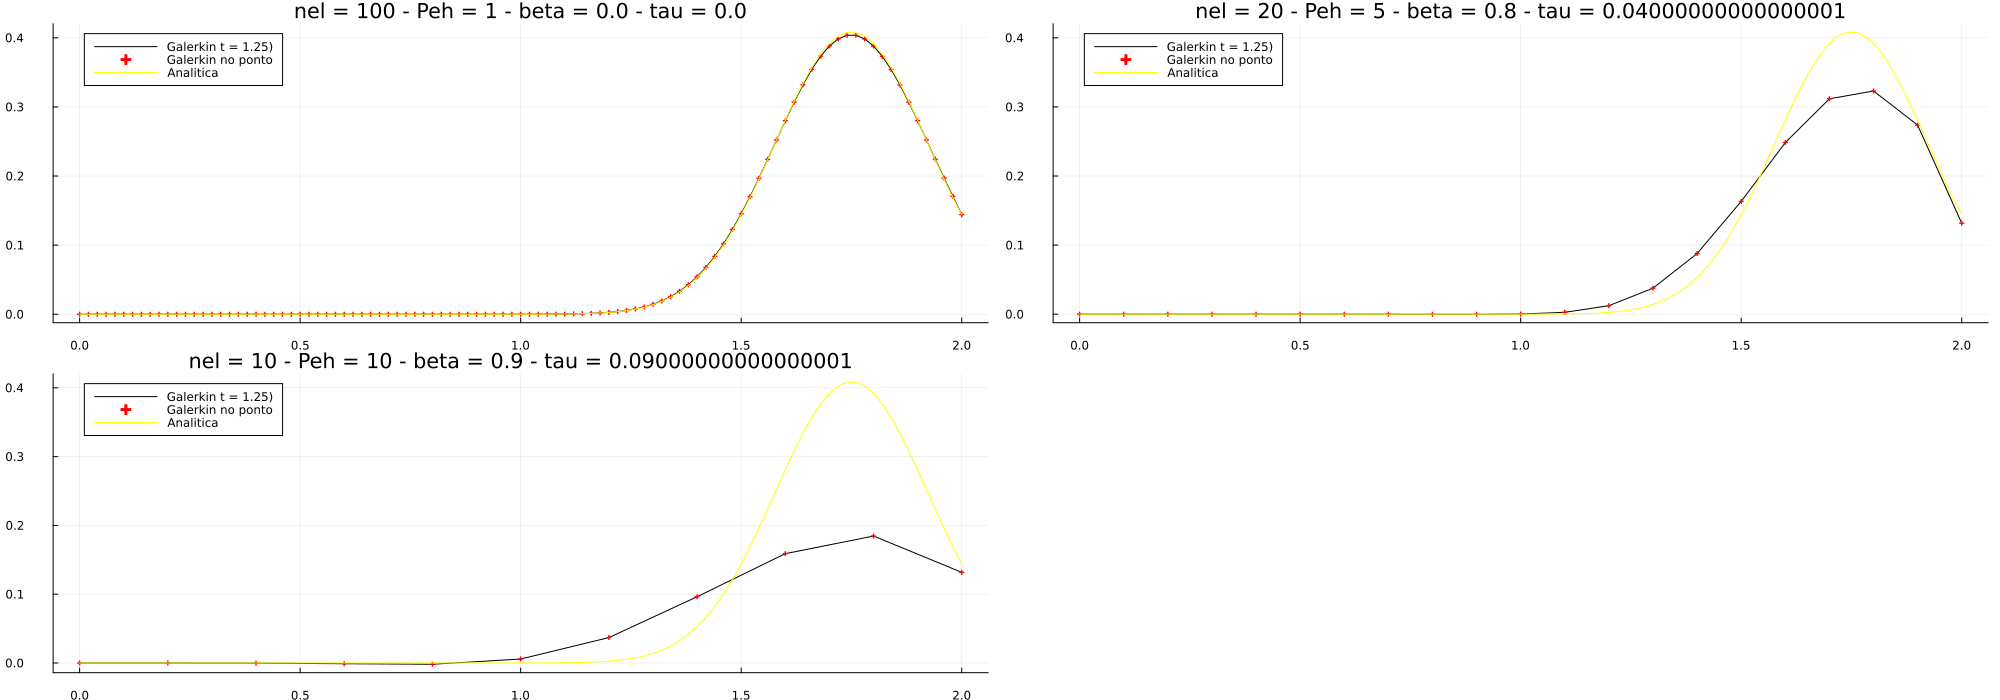

end


In [213]:
function mef_simulacao_letra_c(folder_to_save)
    Peh = [1, 5, 10]
    epsilon = 10^(-2)
    kappa = 1
    degree = 1
    
    xi = a
    xf = b
    
    ti = 0.00
    tf = 1.25
    
    h_Peh = [(P*2*epsilon)/abs(kappa) for P in Peh]
    print(h_Peh)
    print("\n")
    
    n_values = [ceil(Int64,(xf-xi)/(hh)) for hh in h_Peh]
    print((n_values))
    print("\n")
    
    println("a = $a")
    println("b = $b")
    println("ti = $ti")
    println("tf = $tf")
    println("epsilon = $epsilon")
    println("kappa = $kappa")
    
    # Dirichtler
    g_a = 0
    g_b = 0

    # Neumann
    q_a = 0
    q_b = 0

    kappa_a = 10^6
    kappa_b = 10^6
    
    solution_galerkin_over_time = Vector{Vector{Float64}}([])
    xizes = Vector{Vector{Float64}}([])
    solution_galerkin_over_time_phx = Vector{Vector{Vector{Float64}}}([])
    # solution_SUPG_over_time = Vector{Vector{Float64}}([])
    
    # Galerkin
    
        # Galerkin
    p = plot(layout=(3), size=(5000, 5000))
    for (Peh_index, nel) in enumerate(n_values) #l1
        nint = degree + 1
        nen = nint
        
        np = nel*degree + 1
        
        x = LinRange(xi, xf, np)
        
        M = zeros(np, np)
        M_mass = zeros(np, np)
        M_dev_v = zeros(np, np)
        F = zeros(np)

        shg  = shl(1, nen, nint)
        dshg = shl(2, nen, nint)
        # dshg = reverse((dshg))

        t = pe(nint)
        w = we(nint)

        idx = 1

        h = (x[degree+1] - x[1])
        dt = h^2
        time_vector = range(ti, tf, step=dt)
        beta = 1 - (1/Peh[Peh_index])
        tau = beta*h/(2*kappa)
        for n in 1:(nel) #l2
            Me = zeros(nint, nint)
            Me_mass = zeros(nint, nint)
            Me_dev_v = zeros(nint, nint)
            Fe = zeros(nint)
            
            for l in 1:(nint) #l4
                    tt = t[l]
                    ww = w[l]
                    xx = translate_x(tt, x[idx], x[idx+degree])
                    for j in 1:(nen) #l5    
                        
                        # Fe[j] += u(xx) * shg[j, l] * ww * h/2

                        for i in 1:nen #l6
                        # println("\n----------------------------------------------------------------\n")
                        #     println("Me[i, j] = $(Me[i, j])")
                            Me[i, j] += (epsilon + (tau*(kappa^2))) * dshg[i, l] * dshg[j, l] * ww * 2/h
                            # println("Me[i, j] = $(Me[i, j])")
                            Me[i, j] += kappa * shg[i, l] * dshg[j, l] * ww 
                            # println("Me[i, j] = $(Me[i, j])")
                            Me[i, j] += shg[i, l] * shg[j, l] * ww * (h/2)/dt
                            # println("Me[i, j] = $(Me[i, j])")
                            Me[i, j] += tau * kappa * dshg[i, l] * shg[j, l] * ww/dt
                            # println("Me[i, j] = $(Me[i, j])")
                        
                            Me_mass[i, j]  += shg[i, l] * shg[j, l] * ww * (h/2)/dt
                            Me_dev_v[i, j] += tau * kappa * dshg[i, l] * shg[j, l] * ww/dt
                        # println("tau = $tau -> epsilon = $epsilon -> kappa = $kappa -> h = $(h) -> ww = $(ww)")
                        # println("\nMe")    
                        # println(Me)
                        # println("dshg[i, l] = $(dshg[i, l]) -> dshg[j, l] = $(dshg[i, l]) -> shg[i, l] = $(shg[i, l]) -> shg[j, l] = $(shg[j, l])")
                        # println("\n----------------------------------------------------------------\n")
                        end #l6
                            
                    end #l5

            end #l4
            # return
            for i in 0:nint-1 #f7
                # F[idx+i] += Fe[i+1]
                for j in 0:nint-1 #l8
                    M[idx+i, idx+j] += Me[i+1, j+1]
                    M_mass[idx+i, idx+j] += Me_mass[i+1, j+1]
                    M_dev_v[idx+i, idx+j] += Me_dev_v[i+1, j+1]
                end #l8
            end #ef7
            idx += degree
        end #l2
        
        M[1, 1] += kappa_a
        # F[1] += kappa_a*g_a - q_a
        
        M[size(M)[1], size(M)[2]] += kappa_b
        # F[size(F)[1]] += kappa_b*g_b - q_b
        # alphas = M\F
        
        # print(M_mass)
        # return 
        
        tn = ti
        
        # solution_galerkin_over_time
        solution_galerkin_pass0 = zeros(size(x)[1])
        println(size(solution_galerkin_pass0))
        
        for position in 1:size(x)[1]
            solution_galerkin_pass0[position] = phi_0(x[position], epsilon, kappa)
        end
        
        push!(solution_galerkin_over_time, solution_galerkin_pass0)
        counter = 0
        # println("\n\n")
        # println("M")
        # println(M)
        # println("\nM_mass")
        # println(M_mass)
        # println("\nM_dev_v")
        # println(M_dev_v)
        # return
        while(tn <= tf)#w1
            F = (M_mass * solution_galerkin_over_time[size(solution_galerkin_over_time)[1]]) + (M_dev_v * solution_galerkin_over_time[size(solution_galerkin_over_time)[1]])
            g_a = alpha_1(tn, epsilon, kappa)
            g_b = alpha_2(tn, epsilon, kappa)
            F[1] += kappa_a*g_a - q_a
            F[size(F)[1]] += kappa_b*g_b - q_b
            
            alphas = M\F
            push!(solution_galerkin_over_time, alphas)
            
            counter += 1
            tn += dt
        end#w1
        # solution_galerkin_over_time[size(solution_galerkin_over_time)[1]][1]
        # return
        # println(size(solution_galerkin_over_time))
        
        # plot!(p[Peh_index...], x, solution_galerkin_over_time[1], label="Galerkin t = 0", color="black")
        # plot!(p[Peh_index...], x, solution_galerkin_over_time[1], label="Galerkin no ponto", color="red", marker=:cross, seriestype=:scatter, ms=2.5)
        # plot!(p[Peh_index...], range(a, stop=b, length=500), x -> u_ex(x, 0, epsilon, kappa), label="Analitica", color="yellow")
        # plot!(p[Peh_index...], grid=true, legend=:topleft, size=(2000,700))

        # plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1]/4)], label="Galerkin t = $(time_vector[ceil(Int64,size(time_vector)[1]/4)])", color="black")
#         plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1]/4)], label="Galerkin no ponto", color="red", marker=:cross, seriestype=:scatter, ms=2.5)
#         plot!(p[Peh_index...], range(a, stop=b, length=500), x -> u_ex(x, time_vector[ceil(Int64,size(time_vector)[1]/4)], epsilon, kappa), label="Analitica", color="yellow")
#         plot!(p[Peh_index...], grid=true, legend=:topleft, size=(2000,700))
        
#         plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1]/2)], label="Galerkin t = $(time_vector[ceil(Int64,size(time_vector)[1]/2)])", color="black")
#         plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1]/2)], label="Galerkin no ponto", color="red", marker=:cross, seriestype=:scatter, ms=2.5)
#         plot!(p[Peh_index...], range(a, stop=b, length=500), x -> u_ex(x, time_vector[ceil(Int64,size(time_vector)[1]/2)], epsilon, kappa), label="Analitica", color="yellow")
#         plot!(p[Peh_index...], grid=true, legend=:topleft, size=(2000,700))
        
        plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1])], label="Galerkin t = 1.25)", color="black")
        plot!(p[Peh_index...], x, solution_galerkin_over_time[ceil(Int64,size(solution_galerkin_over_time)[1])], label="Galerkin no ponto", color="red", marker=:cross, seriestype=:scatter, ms=2.5)
        plot!(p[Peh_index...], range(a, stop=b, length=500), x -> u_ex(x, 1.25, epsilon, kappa), label="Analitica", color="yellow")
        plot!(p[Peh_index...], grid=true, legend=:topleft, size=(2000,700))
        title!(p[Peh_index...], "nel = $nel - Peh = $(Peh[Peh_index]) - beta = $beta - tau = $tau")
        
        
    end #l1
    # title!(p[1...], "Grau = 1 = nel = 50 - Peh = 1")
    # title!(p[2...], "Grau = 1 = nel = 10 - Peh = 5")
    # title!(p[3...], "Grau = 1 = nel = 5 - Peh = 10")
    display(p)
    savefig(p, joinpath(folder_to_save, "grafico_todos_juntos_beta_limite.png"))
    println("end")
end #function
subfolder_name = "letra_c2"

le_c = joinpath(full_path, subfolder_name)

if !isdir(le_c)
    mkdir(le_c)
end

mef_simulacao_letra_c(le_c)
;